In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
df = pd.read_csv('arima-data.csv',index_col=0,parse_dates=[0])
print(df.head(10))

            Over_rate
Date                 
2016-01-01   0.729730
2016-02-01   0.814815
2016-03-01   0.666667
2016-04-01   0.760000
2016-05-01   0.545455
2016-06-01   0.656250
2016-07-01   0.794118
2016-08-01   0.615385
2016-09-01   0.656250
2016-10-01   0.764706


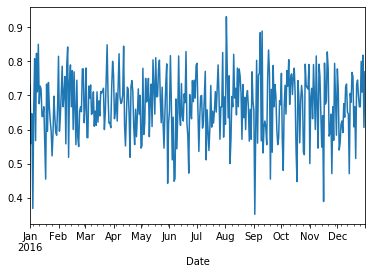

In [25]:
df = df['Over_rate'].resample('D').mean()
df.plot()
plt.show()

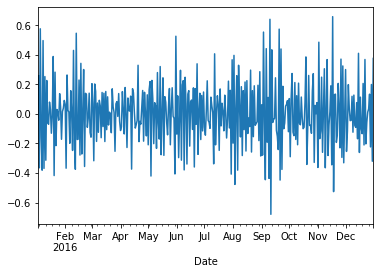

In [26]:
df2 = df.diff()
df2 = df2.diff()
# df2 = df2.diff()
df2 = df2.dropna()
df2.plot()
plt.show()

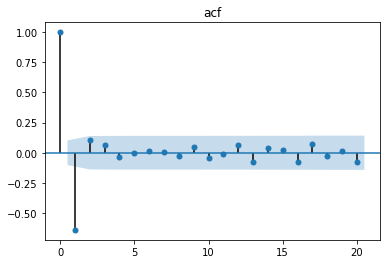

In [27]:
    acf = plot_acf(df2,lags=20)
    plt.title('acf')
    plt.show()

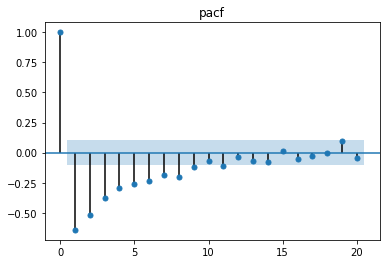

In [28]:
    pacf = plot_pacf(df2, lags=20)
    plt.title('pacf')
    plt.show()

In [33]:
model = ARIMA(df,order=(9,2,1),freq="D")

In [34]:
result = model.fit()

In [35]:
pred = result.predict('2016-12-15','2017-01-05',dynamic=True,typ='levels')
print(pred)

2016-12-15    0.806016
2016-12-16    0.662299
2016-12-17    0.645428
2016-12-18    0.653825
2016-12-19    0.640935
2016-12-20    0.632290
2016-12-21    0.633564
2016-12-22    0.639309
2016-12-23    0.644124
2016-12-24    0.656708
2016-12-25    0.654509
2016-12-26    0.645155
2016-12-27    0.643748
2016-12-28    0.642662
2016-12-29    0.642254
2016-12-30    0.643928
2016-12-31    0.645792
2017-01-01    0.646848
2017-01-02    0.647230
2017-01-03    0.646437
2017-01-04    0.645124
2017-01-05    0.644597
Freq: D, dtype: float64


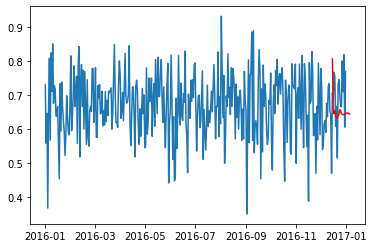

In [36]:
plt.plot(df)
plt.plot(pred,color='red')
plt.show()